**DECISION TREE **

This Tutorial aims at making a simple Decision Tree classifier and do following:
    Train
    
    Predict
    
    Visualize Tree
    
    Save image

In [125]:
#Dependencies
import numpy as np
import pandas as pd
import pydot
import os
import matplotlib.pyplot as plt
from __future__ import print_function,unicode_literals,division

%matplotlib inline
np.random.seed(12)

In [126]:
#Where to save figures
PROJECT_ID='.'
CHAPTER_ID='Decision_tree'


def image_path(fig_id):
    return os.path.join(PROJECT_ID,fig_id)

def save_fig(fig_id, tight_layout=True): #stores image in the same file of ipynb notebook
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

Decision Tree are also the fundamental components of Random Forests

Main functions of Decision Tree are:

1.fit

2.predict_proba

3.predict_log_proba

4.predict

There are 2 criteria for Attribute Selection --- GINI  AND ENTROPY (INFORMATION GAIN)

We are not using any metrics for performance as well as model_selection method because the dataset is small.

Although we can use Stratifiedkfold but its much better to have visualization.

# TRAINING

In [127]:

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
iris=load_iris()
X=iris.data[:,2:]
y=iris.target

#Classifier
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

# Prediction  and Probablities of Classes

In [128]:
print(tree_clf.predict_proba([[168,152]]))
tree_clf.predict([[52,6]])

[[0.         0.02173913 0.97826087]]


array([2])

In [129]:
#Accuracy
y_pred=tree_clf.predict(xtest)
z=accuracy_score(ytest,y_pred)
print(z)

0.495


In [131]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )




Saving figure decision_tree_decision_boundaries_plot


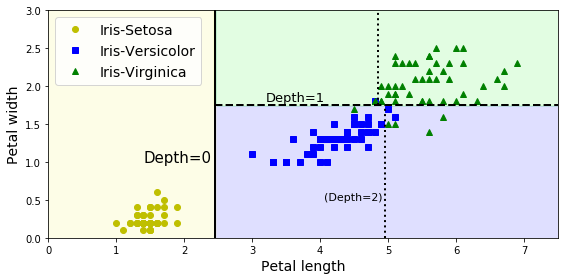

In [101]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="best", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y,legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")

plt.show()

In [109]:
#NEW QUESTIONS

In [82]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_moons


In [81]:
#Generate Dataset and split it into various sets
X,y=make_moons(n_samples=1000,noise=0.4,shuffle=True,random_state=52)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [102]:
#Grid Search
params={"max_leaf_nodes":list(range(2,100)),"min_samples_split":[2,3,4]}
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=51),params,n_jobs=2,verbose=1)
grid_search.fit(xtrain,ytrain)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=2)]: Done 882 out of 882 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=51,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None,

In [103]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=51, splitter='best')

In [114]:
#Accuracy
y_pred=grid_search.predict(xtest)
z=[accuracy_score(ytest,y_pred),f1_score(ytest,y_pred)]
print(z)

[0.845, 0.837696335078534]


In [105]:
#Grid Search
params={"max_depth":list(range(2,100)),"min_samples_split":[2,3,4]}
grid_search2=GridSearchCV(DecisionTreeClassifier(random_state=51),params,n_jobs=2,verbose=1)
grid_search2.fit(xtrain,ytrain)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=2)]: Done 882 out of 882 | elapsed:    2.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=51,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verb

In [106]:
grid_search2.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=51,
            splitter='best')

In [115]:
#Accuracy
y_pred=grid_search.predict(xtest)
z1=[accuracy_score(ytest,y_pred),f1_score(ytest,y_pred)]
print(z1)

[0.845, 0.837696335078534]


In [110]:
#BAsic Decsion Tree
clf=DecisionTreeClassifier(random_state=51)
clf.fit(xtrain,ytrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=51,
            splitter='best')

In [116]:
#Accuracy
y_pred=clf.predict(xtest)
z2=[accuracy_score(ytest,y_pred),f1_score(ytest,y_pred)]
print(z2)

[0.8, 0.797979797979798]
